In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [63]:
# Reading the csv file and storing it in df variable 
df=pd.read_csv('F:\VSCode\Cognizance\Resources\Task-4\Q2.csv')


In [64]:
df.dropna(inplace=True)
df=df.drop(columns=['education','BPMeds','diabetes','prevalentStroke','prevalentHyp'])
df.head()

,male,age,currentSmoker,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0


<AxesSubplot:xlabel='age', ylabel='count'>

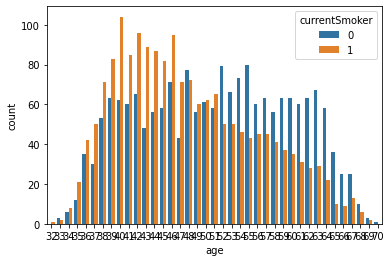

In [65]:
sns.countplot(x='age',hue='currentSmoker',data=df)

<AxesSubplot:xlabel='glucose', ylabel='count'>

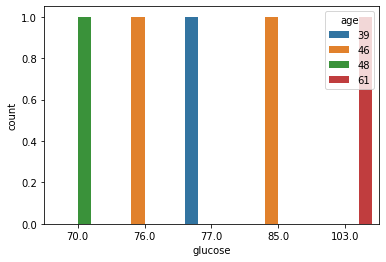

In [71]:
sns.countplot(x='glucose',hue='age',data=df.head())

In [82]:
df=df.drop(['totChol','sysBP','BMI'],axis=1)

In [84]:
df

,male,age,currentSmoker,cigsPerDay,diaBP,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,70.0,80.0,77.0,0
1,0,46,0,0.0,81.0,95.0,76.0,0
2,1,48,1,20.0,80.0,75.0,70.0,0
3,0,61,1,30.0,95.0,65.0,103.0,1
4,0,46,1,23.0,84.0,85.0,85.0,0
...,...,...,...,...,...,...,...,...
4231,1,58,0,0.0,81.0,80.0,81.0,0
4232,1,68,0,0.0,97.0,60.0,79.0,1
4233,1,50,1,1.0,92.0,66.0,86.0,1
4234,1,51,1,43.0,80.0,65.0,68.0,0


In [86]:
## Train Data
x=df.drop('TenYearCHD',axis=1)
y=df['TenYearCHD']

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
method_names=[] 
method_scores=[]

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train) #Fitting
print("Logistic Regression Classification Test Accuracy {}".format(log_reg.score(x_test,y_test)))

Logistic Regression Classification Test Accuracy 0.8387978142076503


c:\Users\TEJASH REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


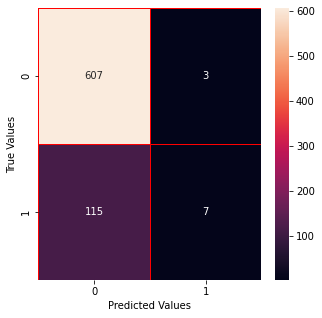

Logistic Regression Accuracy: 0.8387978142076503


In [96]:
y_pred = log_reg.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()
print('Logistic Regression Accuracy:',log_reg.score(x_test,y_test))